## Gradient Boosting Machine

This is an attempt to implement toy Gradient Boosting Machine from scratch. Algorithm used is:
<img src="../Algorithm.jpg" />
This has been taken from the book Elements of Statistical Learning, Second Edition by Tibshirani, Hastie and Friedman

In [1]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_classification
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.datasets import make_gaussian_quantiles
import copy
import numpy as np
%matplotlib inline
import random
import matplotlib.pyplot as plt
import warnings
from copy import deepcopy
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingClassifier
warnings.filterwarnings("ignore")

In [2]:
def GBM(DataInput,depth,maxdepth,M,SamplePercent):
    
    # create list of learners
    LearnerList=[]
    
    Data=copy.deepcopy(DataInput)
    
    # concatenate two columns
    # Final structure of the data:
    # Col 1: X1 (feature 1)
    # Col 2: X2 (feature 2)
    # Col 3: Residuals
    # Col 4: "boost" achieved at each step
    # Col 5: Y (class value)
    
    Data=np.c_[Data,np.array([0]*(len(Data))),Data[:,2]]
    
    for m in range(0,M):
        
        # select random rows, based on the "SamplePercent" Value: SamplePercent = 0 to 100
        RandomSelectedAxes=np.random.choice(Data.shape[0], int((len(Data))*(SamplePercent/100)), replace=False)
        
        # In case of binary classification:
        # we need to grow only one regression tree see Ex. 10.10 in ESL
        _f = -1*Data[RandomSelectedAxes,3]
        
        # Calculate log-odd of each class at every step
        p=np.exp(Data[RandomSelectedAxes,3])/(np.exp(Data[RandomSelectedAxes,3])+np.exp(_f))
        
        # Calculate residual
        Data[RandomSelectedAxes,2]=Data[RandomSelectedAxes,4]-p
        
        # Fit a regression tree to the residuals
        Learner = DecisionTreeRegressor(max_depth=maxdepth)
        Learner.fit(Data[RandomSelectedAxes[:,None],[0,1]], Data[RandomSelectedAxes,2])
        
        # Get prediction for each example
        Prediction=Learner.predict(Data[:,[0,1]])
        
        # Get unique Regions R1, R2... Rn
        UniquePredictions = np.unique(Prediction)
        
        # Calculate gamma for each Region
        GammaList = []
        
        for UqPred in UniquePredictions:
            GammaList.append([UqPred,(1/2)*sum(Data[np.where(Prediction==UqPred)][:,2])/sum((abs(Data[np.where(Prediction==UqPred)][:,2])*(1-abs(Data[np.where(Prediction==UqPred)][:,2]))))])
        
        GammaList=np.array(GammaList)
        
        # Update learner value for each data point
        for k in range(len(Data)):
            Data[k,3]=Data[k,3]+GammaList[GammaList[:,0]==Prediction[k],1]
        
        # Append the learner at this stage to the learner list
        LearnerList.append(Learner)
        
    return LearnerList

In [3]:
def plot(data):
    xx = np.linspace(min(data[:,0])-0.1, max(data[:,0])+0.1, 30)
    yy = np.linspace(min(data[:,1])-0.1, max(data[:,1])+0.1, 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.array(np.vstack([XX.ravel(), YY.ravel()]).T)

    pred=[0]*len(xy)
    pred=np.array(pred)
    okky=[0]*len(xy)
    for i in range(0,len(xy)):
        for tree_model in learners:

            okky[i]=okky[i]+tree_model.predict(xy[i,:].reshape(1,-1))

        if okky[i]>=0:
            pred[i]=1
        else:
            pred[i]=0
    
    Z=pred.reshape(XX.shape)
    f = plt.figure(figsize=(14,5))
    ax = f.add_subplot(121)
    ax2 = f.add_subplot(122)
    ax.scatter(data[:,0], data[:,1],c=data[:,2],s=50,edgecolors='black')
    plt.subplot(122)
    ax2.contourf(XX, YY, Z,cmap=plt.cm.coolwarm,alpha=0.9)
    ax2.scatter(data[:,0], data[:,1],c=data[:,2],s=50,edgecolors='black')
    plt.show()

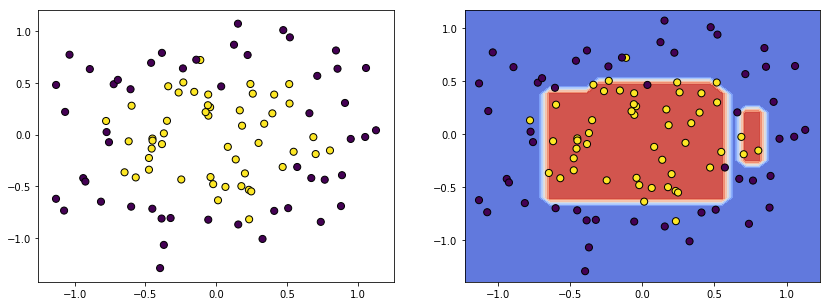

In [4]:
X,Y=make_circles(noise=0.2, factor=0.5, random_state=1)
data=np.append(X,Y.reshape(-1,1),axis=1)
M=100
learners=GBM(np.copy(data),0,1,M,100)
plot(data)

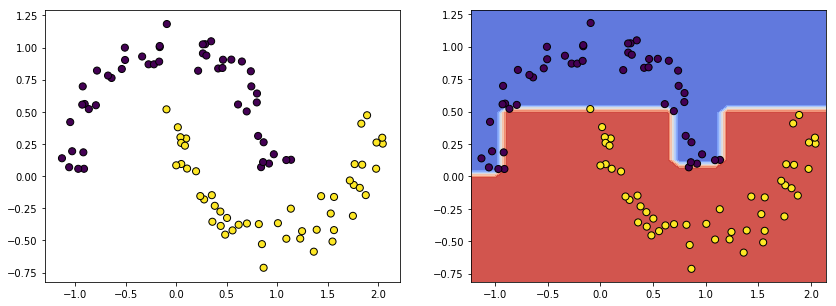

In [5]:
X,Y=make_moons(n_samples=100, shuffle=True, noise=0.1, random_state=100)
data=np.append(X,Y.reshape(-1,1),axis=1)
M=20
learners=GBM(np.copy(data),0,1,M,100)
plot(data)

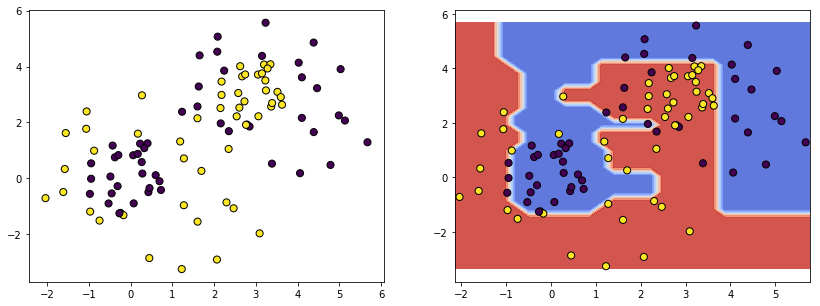

In [6]:
X1, y1 = make_gaussian_quantiles(cov=2.,
                                 n_samples=50, n_features=2,
                                 n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples=50, n_features=2,
                                 n_classes=2, random_state=1)
X = np.concatenate((X1, X2))
Y = np.concatenate((y1, - y2 + 1))

data=np.append(X,Y.reshape(-1,1),axis=1)
M=100
learners=GBM(np.copy(data),0,1,M,100)
plot(data)